In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("mushroom.csv")
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [3]:
print("\nSHAPE:")
print(df.shape)


SHAPE:
(2000, 26)


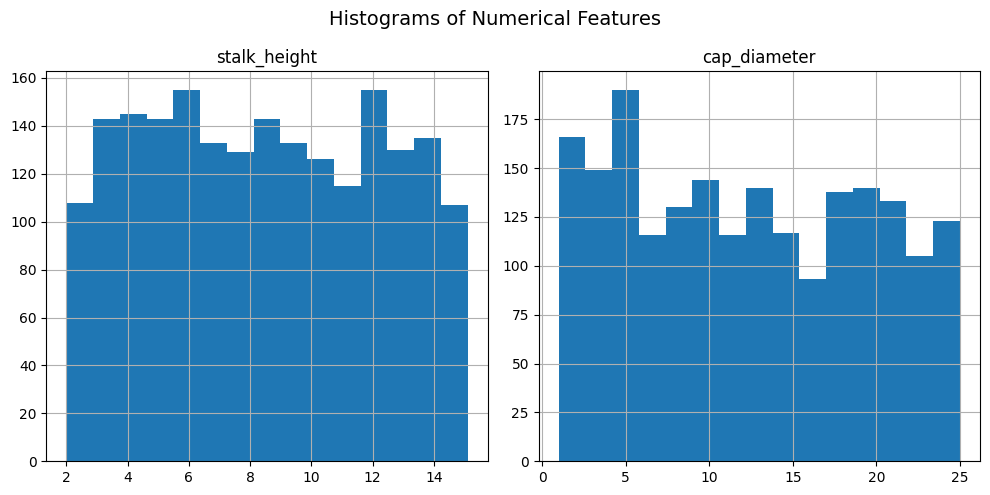

In [4]:
# HISTOGRAMS FOR NUMERICAL FEATURES
num_cols = ['stalk_height', 'cap_diameter']
df[num_cols].hist(figsize=(10,5), bins=15)
plt.suptitle("Histograms of Numerical Features", fontsize=14)
plt.tight_layout()
plt.show()

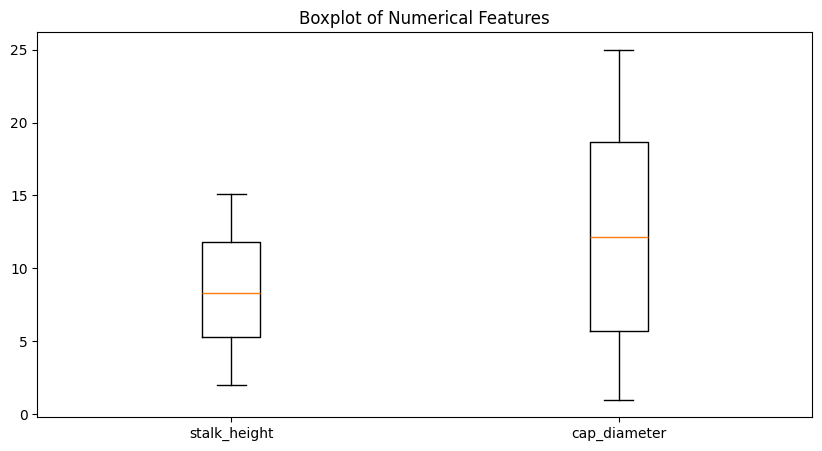

In [5]:
#BOXPLOTS FOR NUMERICAL FEATURES
plt.figure(figsize=(10,5))
plt.boxplot([df[col] for col in num_cols], labels=num_cols)
plt.title("Boxplot of Numerical Features")
plt.show()


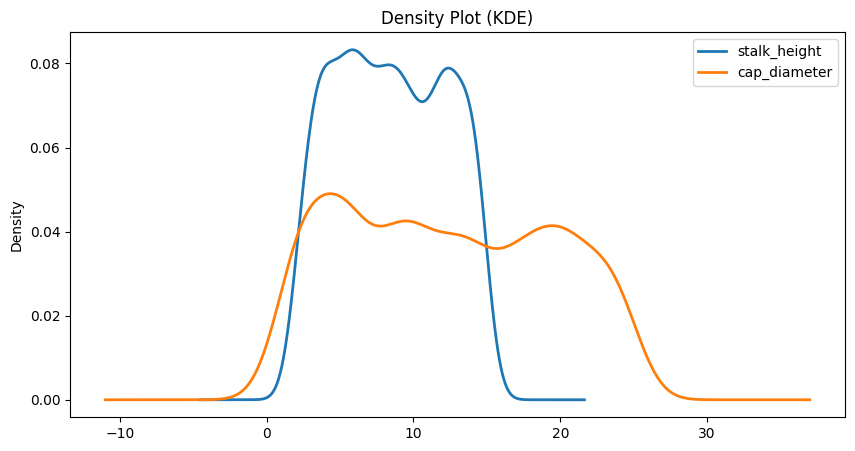

In [6]:
plt.figure(figsize=(10,5))
for col in num_cols:
    df[col].plot(kind='density', linewidth=2, label=col)

plt.legend()
plt.title("Density Plot (KDE)")
plt.show()

In [7]:
from sklearn.preprocessing import LabelEncoder
df_encoded = df.apply(LabelEncoder().fit_transform)

# SPLITTING DATA
from sklearn.model_selection import train_test_split
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
X_train

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_height,cap_diameter
968,894,4,0,4,0,7,2,2,1,6,...,8,0,1,1,3,4,3,2,639,631
240,330,3,0,6,1,6,2,0,1,10,...,4,0,1,1,1,1,2,6,301,591
819,939,1,1,0,0,3,1,2,0,11,...,8,0,0,1,2,4,0,5,349,175
692,261,4,2,2,1,4,2,2,1,2,...,5,0,2,1,2,7,0,2,472,674
420,524,4,3,7,1,5,0,1,1,7,...,2,1,1,0,0,2,1,0,932,359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,480,4,2,8,0,1,3,0,0,8,...,4,0,0,0,6,2,3,6,672,515
1294,951,1,1,6,1,4,3,2,1,8,...,8,0,0,0,5,2,3,0,28,337
860,2,3,3,0,0,4,0,2,0,6,...,4,0,3,2,0,3,4,5,101,371
1459,839,4,1,8,0,1,1,1,0,4,...,7,0,2,0,5,6,4,5,304,869


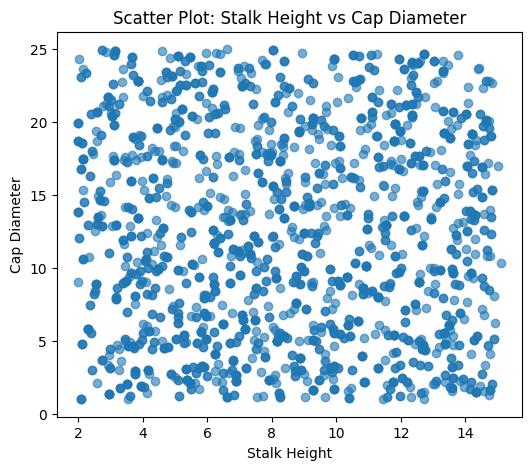

In [9]:
# Scatter plot
plt.figure(figsize=(6,5))
plt.scatter(df['stalk_height'], df['cap_diameter'], alpha=0.6)
plt.xlabel("Stalk Height")
plt.ylabel("Cap Diameter")
plt.title("Scatter Plot: Stalk Height vs Cap Diameter")
plt.show()

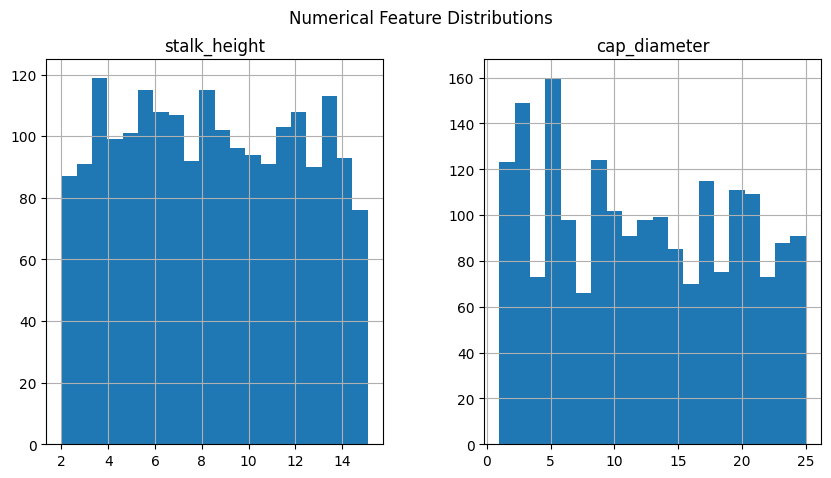

In [10]:
df[num_cols].hist(figsize=(10,5), bins=20)
plt.suptitle("Numerical Feature Distributions")
plt.show()

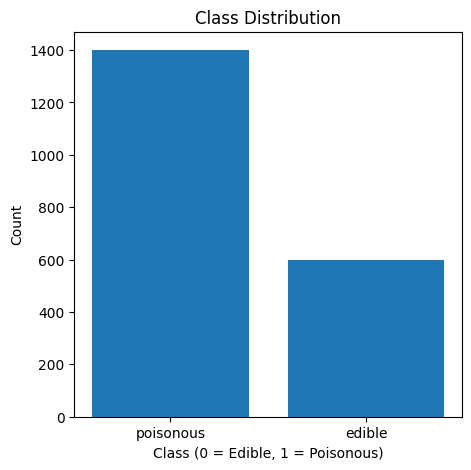

Class counts:
class
poisonous    1400
edible        600
Name: count, dtype: int64


In [11]:
class_counts = df['class'].value_counts()

plt.figure(figsize=(5,5))
plt.bar(class_counts.index.astype(str), class_counts.values)
plt.xlabel("Class (0 = Edible, 1 = Poisonous)")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()

print("Class counts:")
print(class_counts)

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score

In [24]:
model = SVC(C=0.6, kernel='linear')
model.fit(X_train,y_train)

,C,0.6
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [25]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [30]:
print("===== LINEAR KERNEL =====")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

===== LINEAR KERNEL =====
Accuracy: 0.6675
Precision: 0.44555625
Recall: 0.6675
F1 Score: 0.5344002998500749


In [38]:
lin_acc = accuracy_score(y_test, y_pred)
lin_prec = precision_score(y_test, y_pred, average='weighted')
lin_rec = recall_score(y_test, y_pred, average='weighted')
lin_f1 = f1_score(y_test, y_pred, average='weighted')


In [39]:
model_poly = SVC(C=0.6, kernel='poly', degree=3)
model_poly.fit(X_train, y_train)
y_pred = model_poly.predict(X_test)

print("===== POLYNOMIAL (POLY) KERNEL =====")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))


===== POLYNOMIAL (POLY) KERNEL =====
Accuracy: 0.6675
Precision: 0.44555625
Recall: 0.6675
F1 Score: 0.5344002998500749


In [40]:
poly_acc = accuracy_score(y_test, y_pred)
poly_prec = precision_score(y_test, y_pred, average='weighted')
poly_rec = recall_score(y_test, y_pred, average='weighted')
poly_f1 = f1_score(y_test, y_pred, average='weighted')


In [41]:
model_rbf = SVC(C=0.6, kernel='rbf')
model_rbf.fit(X_train, y_train)
y_pred = model_rbf.predict(X_test)

print("===== RBF KERNEL =====")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))


===== RBF KERNEL =====
Accuracy: 0.6675
Precision: 0.44555625
Recall: 0.6675
F1 Score: 0.5344002998500749


In [42]:
rbf_acc = accuracy_score(y_test, y_pred)
rbf_prec = precision_score(y_test, y_pred, average='weighted')
rbf_rec = recall_score(y_test, y_pred, average='weighted')
rbf_f1 = f1_score(y_test, y_pred, average='weighted')


In [43]:
model_sigmoid = SVC(C=0.6, kernel='sigmoid')
model_sigmoid.fit(X_train, y_train)
y_pred = model_sigmoid.predict(X_test)

print("===== SIGMOID KERNEL =====")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))


===== SIGMOID KERNEL =====
Accuracy: 0.5325
Precision: 0.5186003425892536
Recall: 0.5325
F1 Score: 0.5249174885158818


In [44]:
sig_acc = accuracy_score(y_test, y_pred)
sig_prec = precision_score(y_test, y_pred, average='weighted')
sig_rec = recall_score(y_test, y_pred, average='weighted')
sig_f1 = f1_score(y_test, y_pred, average='weighted')


In [45]:
import pandas as pd

df_results = pd.DataFrame({
    'Accuracy':   [lin_acc, poly_acc, rbf_acc, sig_acc],
    'Precision':  [lin_prec, poly_prec, rbf_prec, sig_prec],
    'Recall':     [lin_rec, poly_rec, rbf_rec, sig_rec],
    'F1 Score':   [lin_f1, poly_f1, rbf_f1, sig_f1]
}, index=['Linear', 'Poly', 'RBF', 'Sigmoid'])

df_results


,Accuracy,Precision,Recall,F1 Score
Linear,0.5325,0.518600,0.5325,0.524917
Poly,0.6675,0.445556,0.6675,0.534400
RBF,0.6675,0.445556,0.6675,0.534400
Sigmoid,0.5325,0.518600,0.5325,0.524917


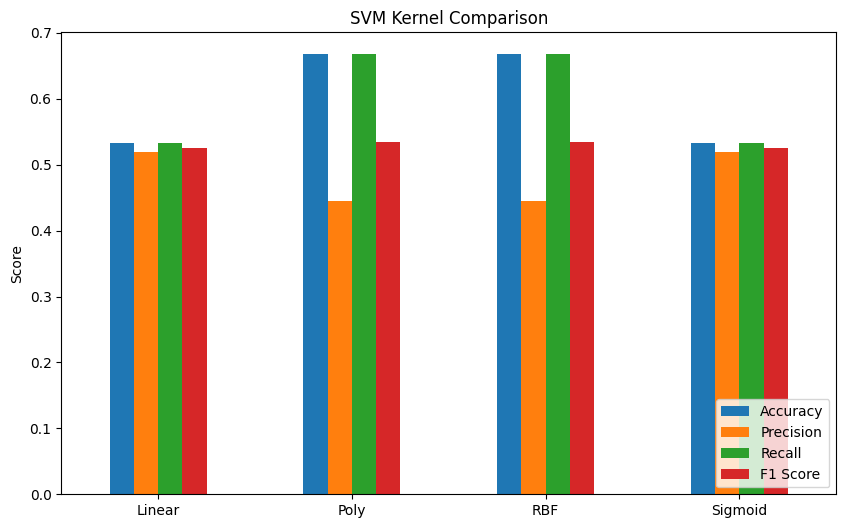

In [46]:
df_results.plot(kind='bar', figsize=(10, 6))
plt.title("SVM Kernel Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()


In [49]:
for name, acc in df_results.items():
    print(name, acc)



Accuracy Linear     0.5325
Poly       0.6675
RBF        0.6675
Sigmoid    0.5325
Name: Accuracy, dtype: float64
Precision Linear     0.518600
Poly       0.445556
RBF        0.445556
Sigmoid    0.518600
Name: Precision, dtype: float64
Recall Linear     0.5325
Poly       0.6675
RBF        0.6675
Sigmoid    0.5325
Name: Recall, dtype: float64
F1 Score Linear     0.524917
Poly       0.534400
RBF        0.534400
Sigmoid    0.524917
Name: F1 Score, dtype: float64
